In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tqdm import tqdm
import pandas as pd
from IPython.display import display
import sympy
from scipy.signal import find_peaks
import pywt
from scipy.signal import detrend

#Señal EEG

Señal 1  EEG en reposo: [392. 377. 377. ... 911. 905. 885.]
Señal 2  Ojos cerrados - Ojos abiertos : [179. 169. 220. ... 231. 251. 266.]
Señal 3 ejercicio mental : [301. 295. 295. ... 423. 433. 463.]


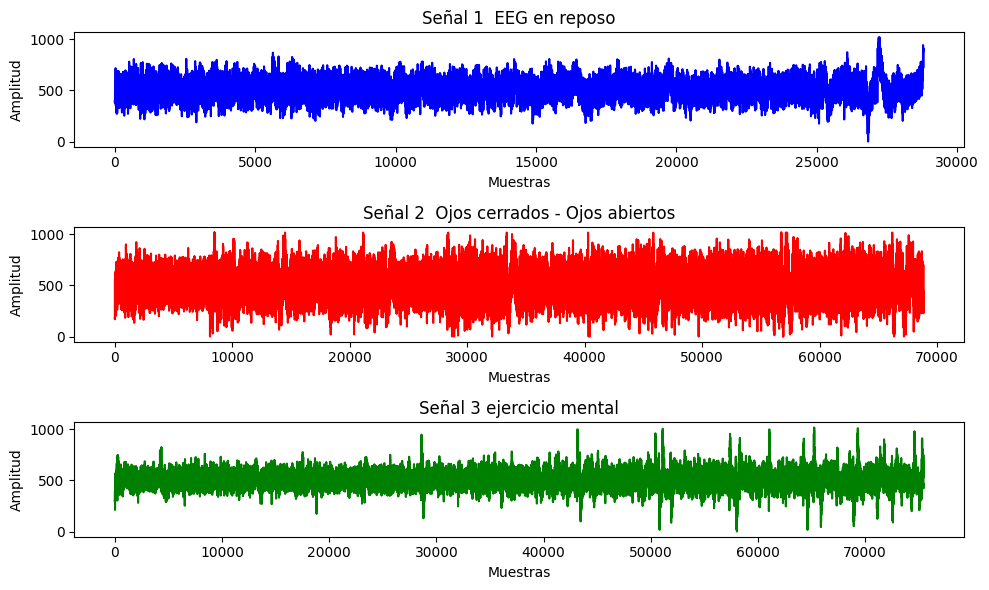

In [6]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1= np.genfromtxt('/content/drive/MyDrive/G1_INTRO A SEÑALES/EEG30sreposo.txt')
array2=np.genfromtxt('/content/drive/MyDrive/G1_INTRO A SEÑALES/EEGparpadeo.txt')
array3=np.genfromtxt('/content/drive/MyDrive/G1_INTRO A SEÑALES/ejercicio2.txt')

array1 = array1[:,8]
print("Señal 1  EEG en reposo:",array1)
array2 = array2[:,8]
print("Señal 2  Ojos cerrados - Ojos abiertos :",array2)
array3= array3[:,8]
print("Señal 3 ejercicio mental :",array3)


plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(array1, color='blue')
plt.title('Señal 1  EEG en reposo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(array2, color='red')
plt.title('Señal 2  Ojos cerrados - Ojos abiertos')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(array3, color='green')
plt.title('Señal 3 ejercicio mental')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

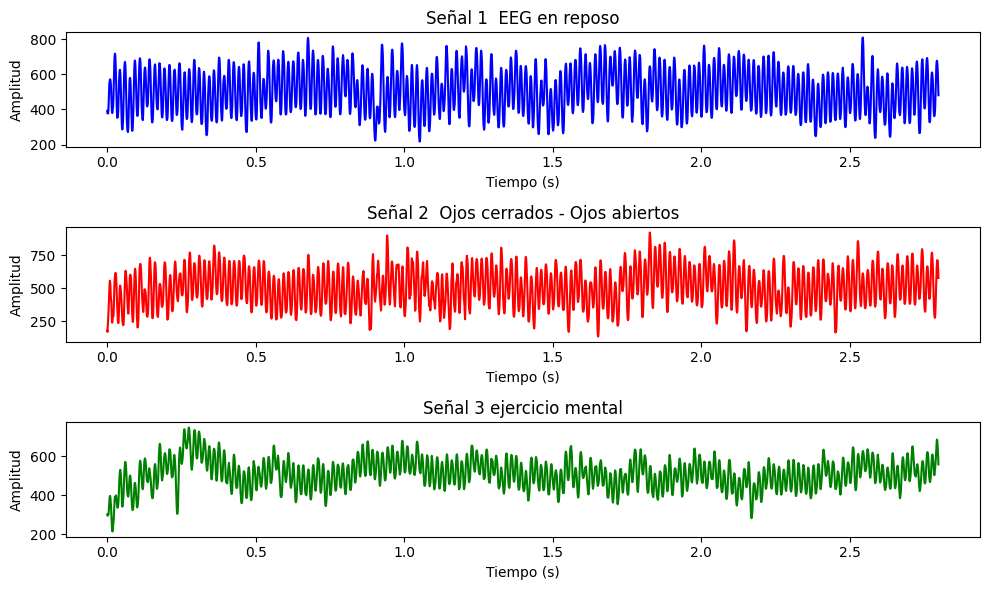

In [7]:
Fs=1000; #Frecuencia de muestreo
T1=1/Fs
array1=array1[0:2800]
array2=array2[0:2800]
array3=array3[0:2800]
#Los elementos ahora son los mismos para todas las señales
M = len(array1)
n = np.arange(0,M)

t = n/Fs
# Crear figuras y subgráficos
plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(t, array1, color='blue')
plt.title('Señal 1  EEG en reposo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(t, array2, color='red')
plt.title('Señal 2  Ojos cerrados - Ojos abiertos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(t, array3, color='green')
plt.title('Señal 3 ejercicio mental')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

# DFT - Señales originales

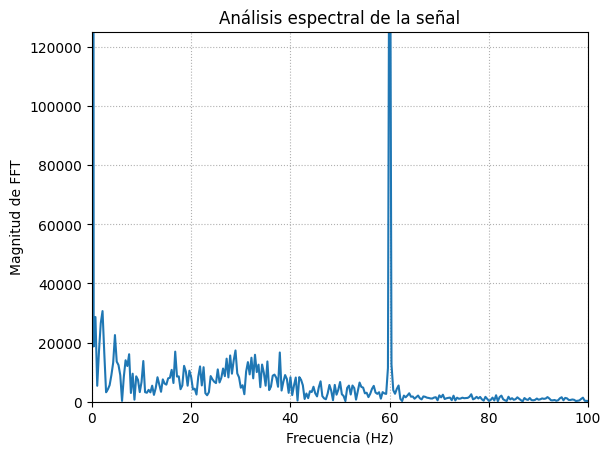

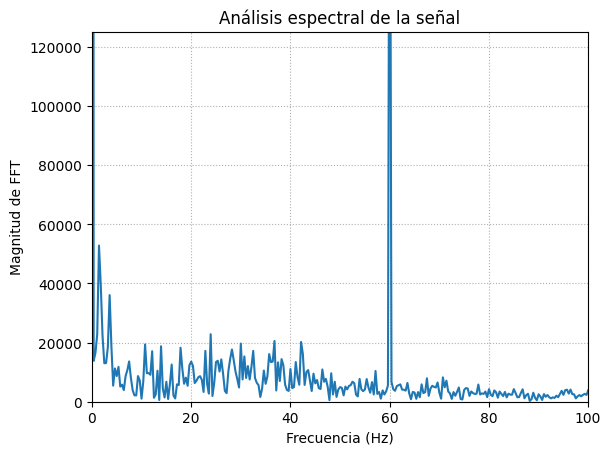

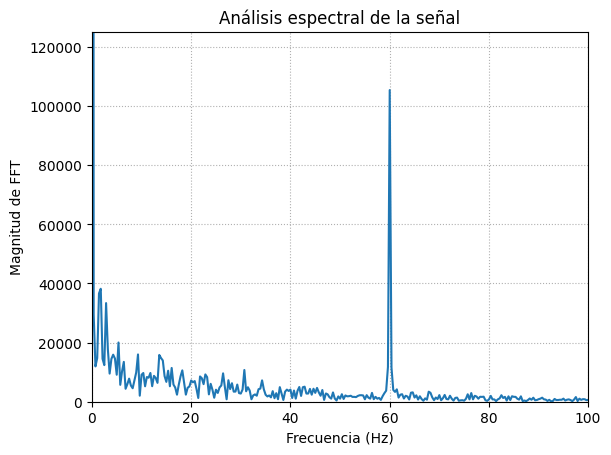

In [8]:
def analisis_espectral(signal, Fs):
    N = len(signal)
    X = np.fft.fft(signal, N)
    X = X[0:N//2]
    Xm = np.abs(X)
    F = np.linspace(0, Fs/2, N//2)

    plt.plot(F, Xm)
    plt.grid(linestyle=":")
    plt.title("Análisis espectral de la señal")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud de FFT")
    plt.xlim([0, 100])  # Limitando el rango de frecuencia para la visualización
    plt.ylim([0, 0.125*1e6])  # Limitando el rango del espectro para la visualización

    plt.show()

# Usando la función para las señales
analisis_espectral(array1, Fs)
analisis_espectral(array2, Fs)
analisis_espectral(array3, Fs)

#Magnitud vs Frecuencia

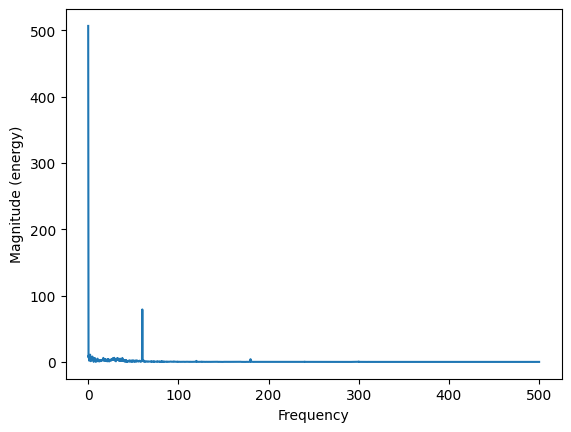

In [9]:
#Reposo
plt.magnitude_spectrum(array1, Fs=1000,window=np.ones(array1.shape))
plt.show()

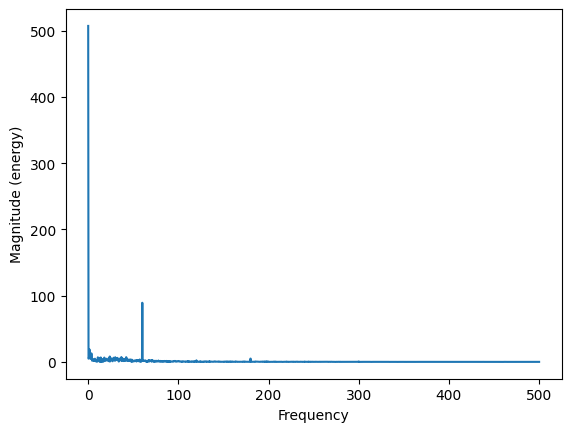

In [10]:
#Ciclo de ojos cerrados y ojos abiertos
plt.magnitude_spectrum(array2, Fs=1000,window=np.ones(array2.shape))
plt.show()

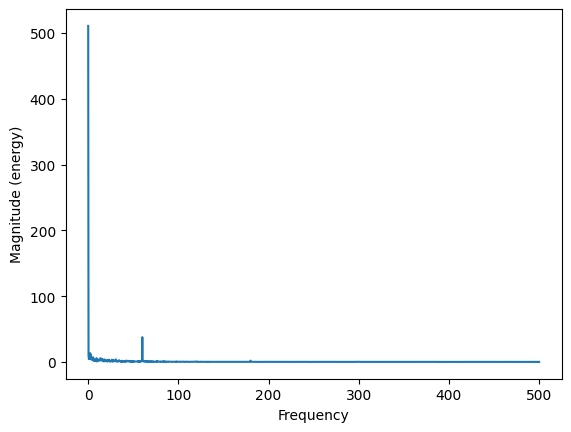

In [11]:
#100 peruanos dicen - Solución de preguntas
plt.magnitude_spectrum(array3, Fs=1000,window=np.ones(array3.shape))
plt.show()

#Filtro Wavelet

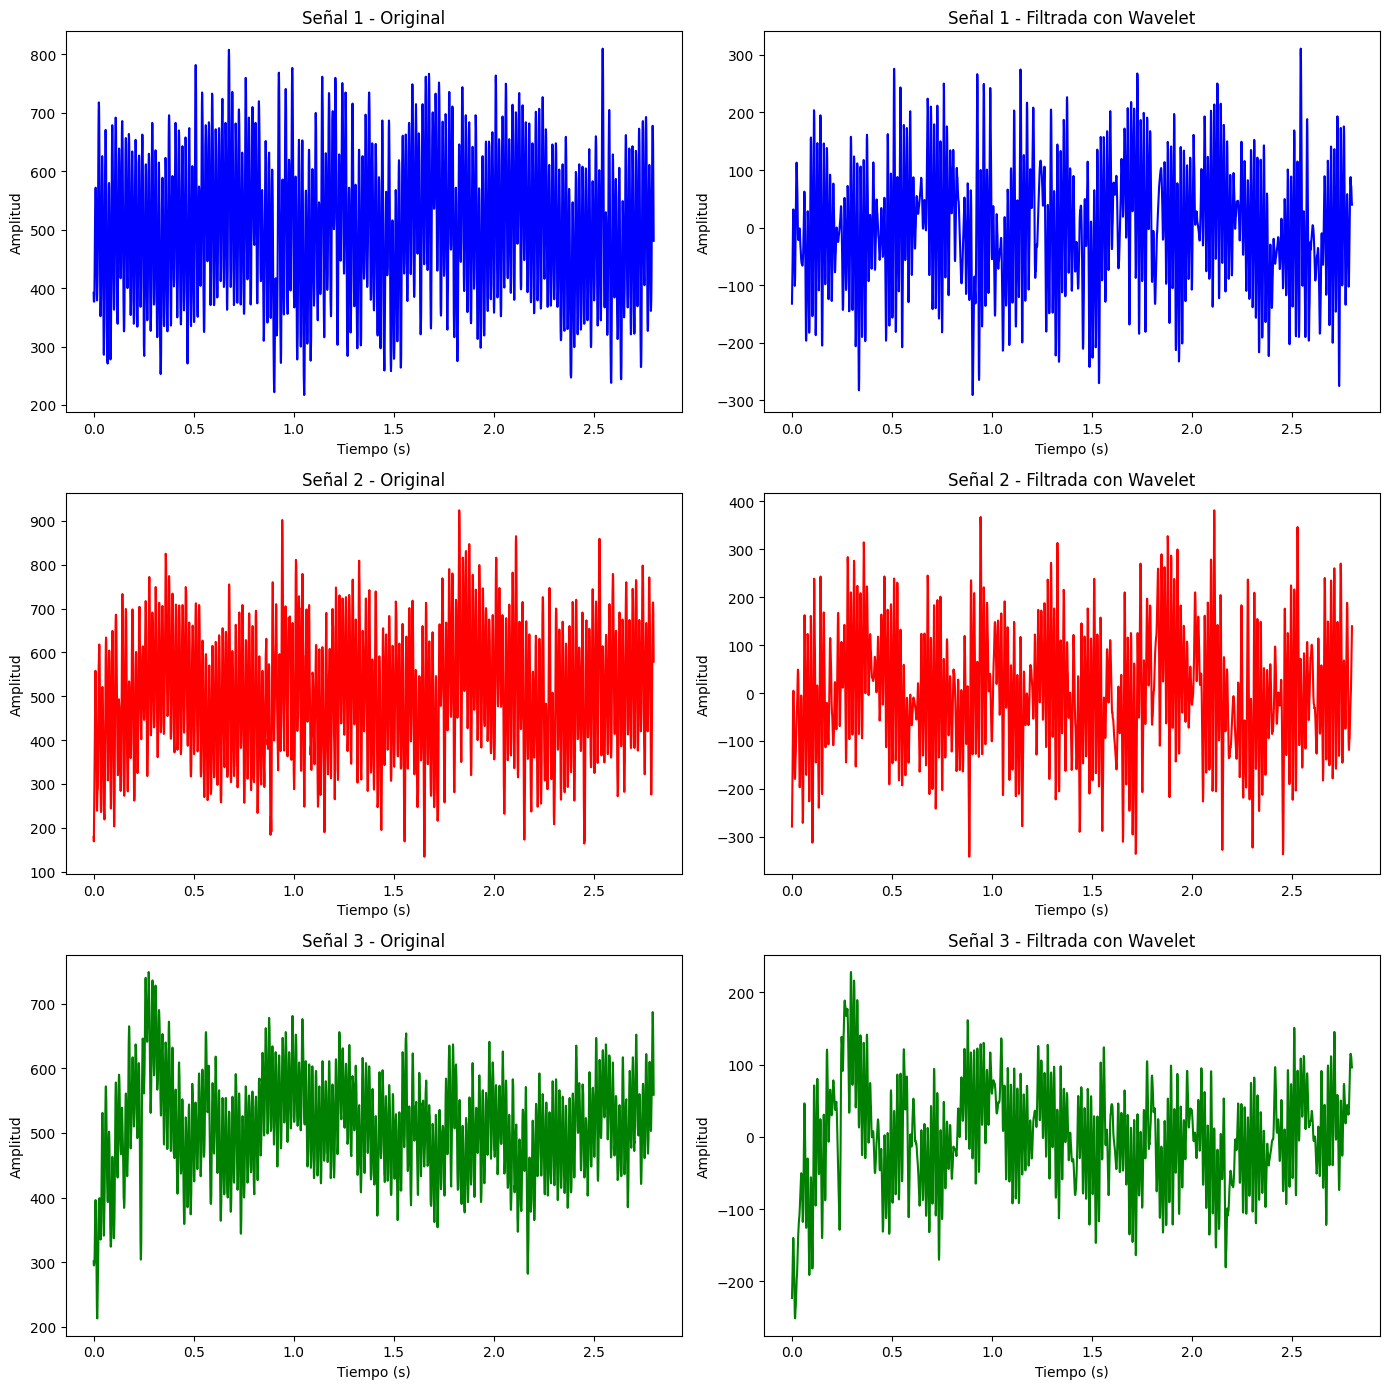

In [12]:
Fs = 1000
T1 = 1 / Fs

# Número de elementos después del recorte
M = len(array1)
n = np.arange(0, M)
t = n / Fs

# Función para aplicar un filtro wavelet y umbralización suave
def apply_wavelet_filter(signal, wavelet='db4', level=3):
    # Eliminar la tendencia lineal
    signal_detrended = detrend(signal)

    # Calcular el umbral global
    sigma = np.median(np.abs(signal_detrended - np.median(signal_detrended))) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(signal_detrended)))

    # Descomposición wavelet
    coeffs = pywt.wavedec(signal_detrended, wavelet, level=level)

    # Aplicar umbralización suave
    coeffs_thresh = [pywt.threshold(c, threshold, mode='soft') if i > 0 else c for i, c in enumerate(coeffs)]

    # Reconstrucción de la señal
    filtered_signal = pywt.waverec(coeffs_thresh, wavelet)
    # Asegurarse de que la señal reconstruida tenga la misma longitud que la original
    filtered_signal = filtered_signal[:len(signal)]
    return filtered_signal, coeffs, coeffs_thresh

# Aplicar el filtro wavelet a las señales
filtered_array1, coeffs1, coeffs_thresh1 = apply_wavelet_filter(array1)
filtered_array2, coeffs2, coeffs_thresh2 = apply_wavelet_filter(array2)
filtered_array3, coeffs3, coeffs_thresh3 = apply_wavelet_filter(array3)

# Crear figuras y subgráficos para las señales originales y filtradas
plt.figure(figsize=(14, 14))

# Gráfico de la señal original y filtrada para array1
plt.subplot(321)
plt.plot(t, array1, color='blue', label='Original')
plt.title('Señal 1 - Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(322)
plt.plot(t, filtered_array1, color='blue', label='Filtrada')
plt.title('Señal 1 - Filtrada con Wavelet')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal original y filtrada para array2
plt.subplot(323)
plt.plot(t, array2, color='red', label='Original')
plt.title('Señal 2 - Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(324)
plt.plot(t, filtered_array2, color='red', label='Filtrada')
plt.title('Señal 2 - Filtrada con Wavelet')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Gráfico de la señal original y filtrada para array3
plt.subplot(325)
plt.plot(t, array3, color='green', label='Original')
plt.title('Señal 3 - Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(326)
plt.plot(t, filtered_array3, color='green', label='Filtrada')
plt.title('Señal 3 - Filtrada con Wavelet')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

##Reposo

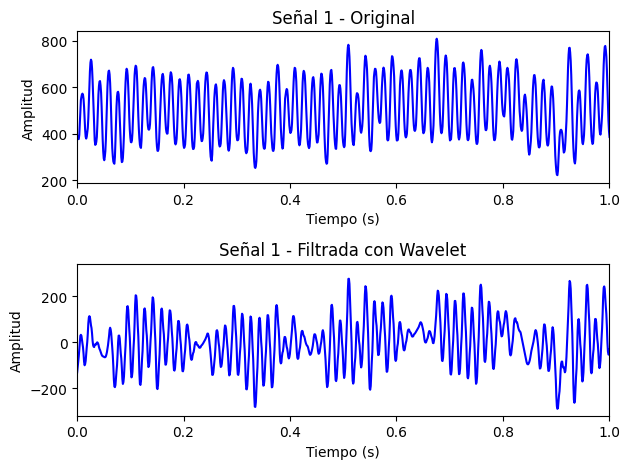

In [13]:
plt.subplot(211)
plt.plot(t, array1, color='blue', label='Original')
plt.title('Señal 1 - Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0,1)


plt.subplot(212)
plt.plot(t, filtered_array1, color='blue', label='Filtrada')
plt.title('Señal 1 - Filtrada con Wavelet')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0,1)
plt.tight_layout()
plt.show()


##Ciclo de ojos cerrados y abiertos

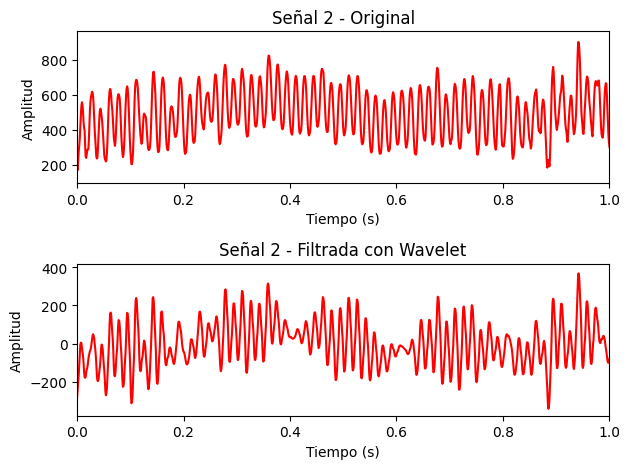

In [14]:
plt.subplot(211)
plt.plot(t, array2, color='red', label='Original')
plt.title('Señal 2 - Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0,1)

plt.subplot(212)
plt.plot(t, filtered_array2, color='red', label='Filtrada')
plt.title('Señal 2 - Filtrada con Wavelet')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0,1)
plt.tight_layout()
plt.show()

##Ejercicio mental

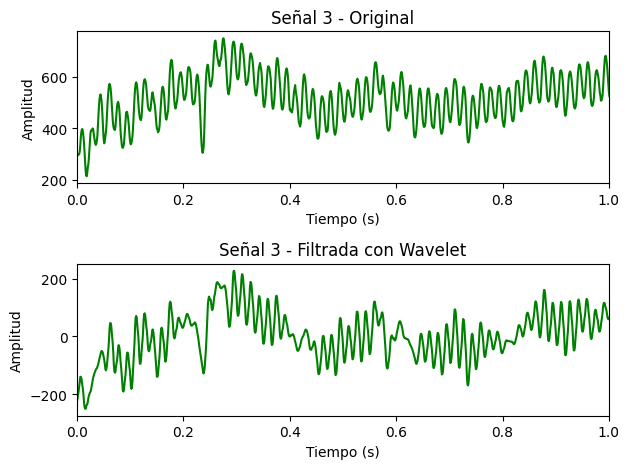

In [15]:
plt.subplot(211)
plt.plot(t, array3, color='green', label='Original')
plt.title('Señal 3 - Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0,1)

plt.subplot(212)
plt.plot(t, filtered_array3, color='green', label='Filtrada')
plt.title('Señal 3 - Filtrada con Wavelet')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim(0,1)

plt.tight_layout()
plt.show()

#DFT de señales filtradas

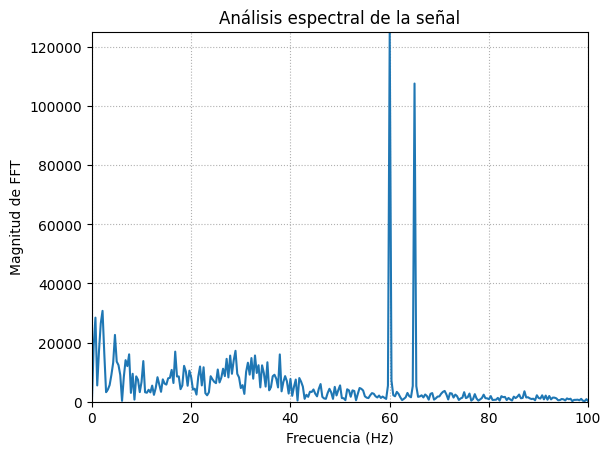

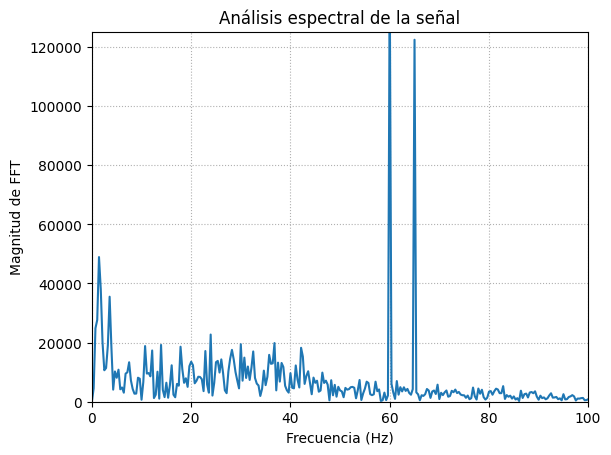

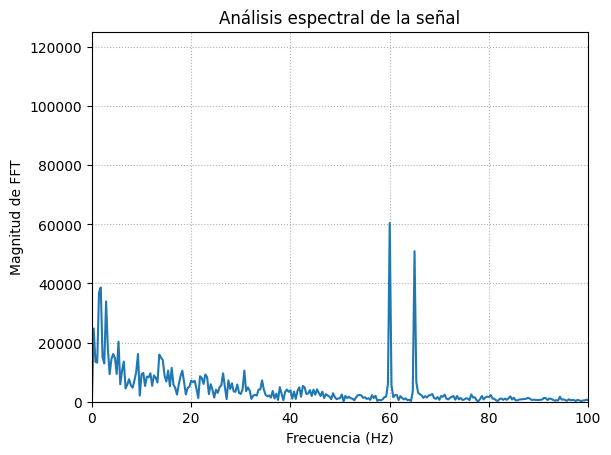

In [16]:
analisis_espectral(filtered_array1, Fs)
analisis_espectral(filtered_array2, Fs)
analisis_espectral(filtered_array3, Fs)

#Niveles de descomposición de la wavelet

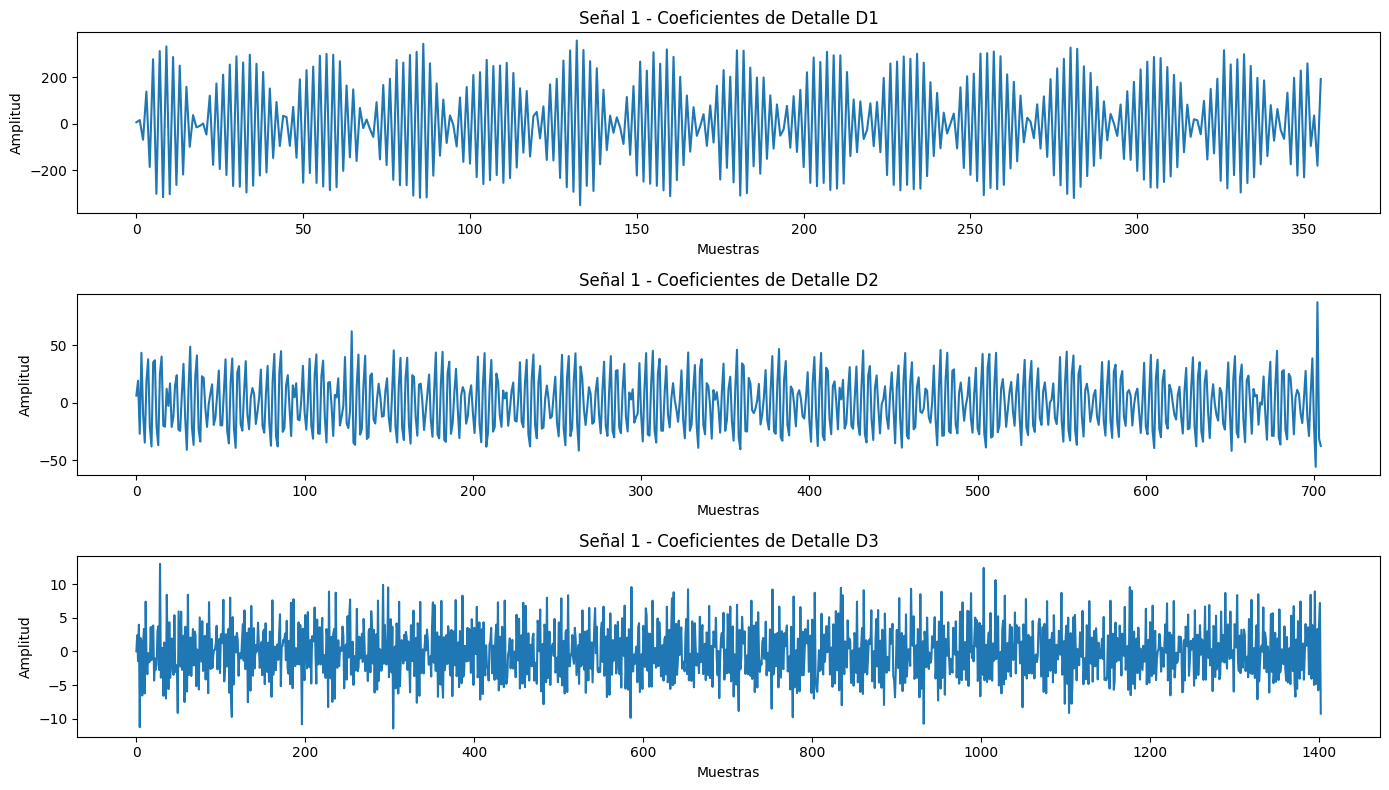

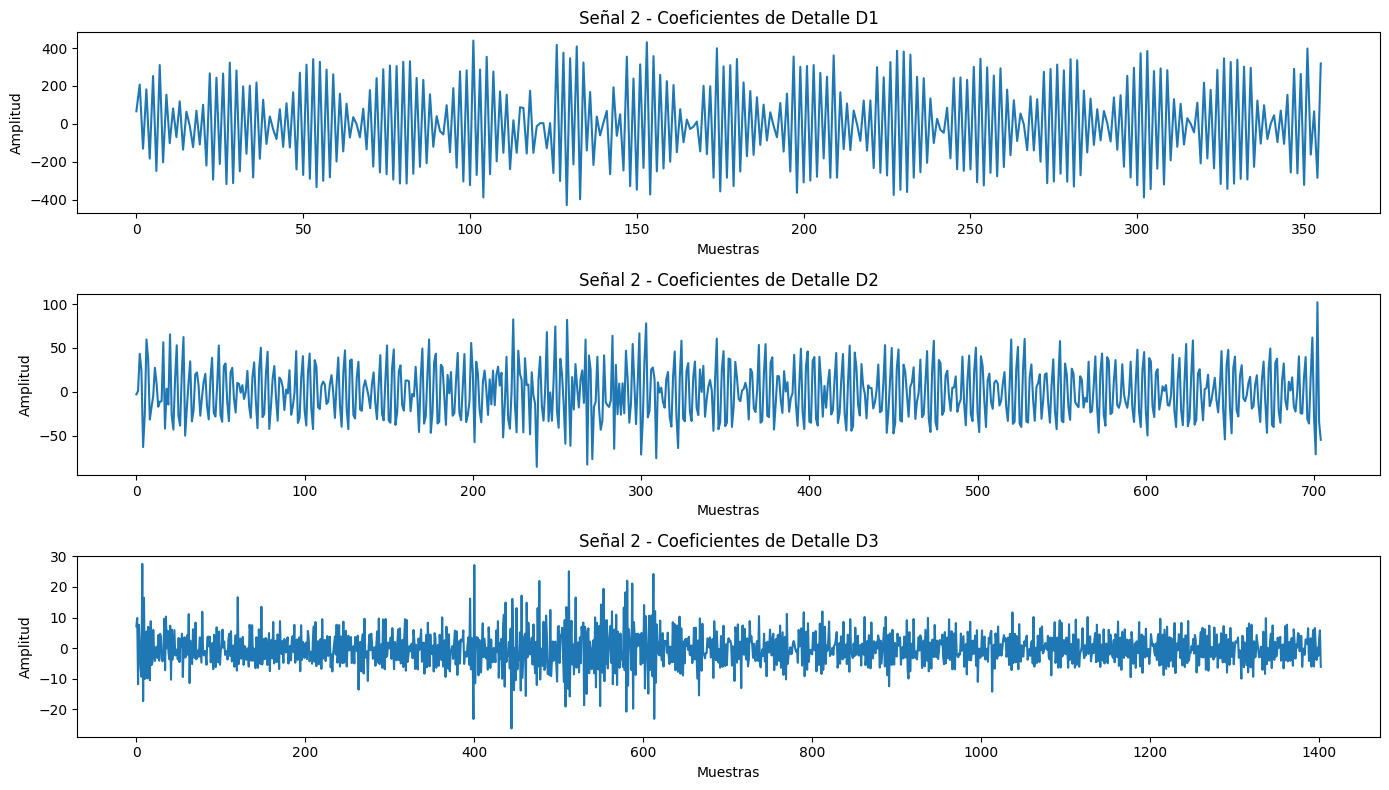

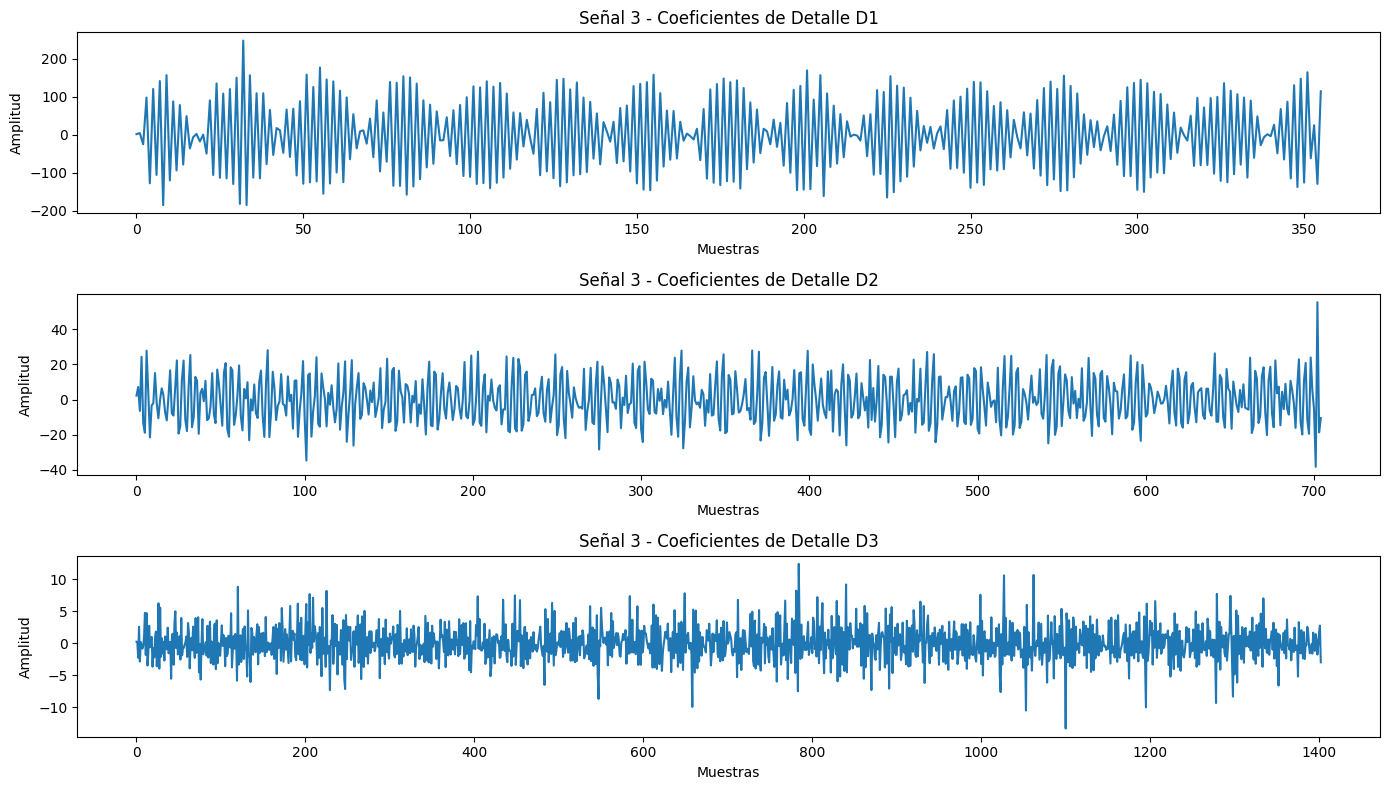

In [17]:
def plot_wavelet_details(coeffs, title):
    plt.figure(figsize=(14, 8))
    for i in range(1, len(coeffs)):
        plt.subplot(len(coeffs)-1, 1, i)
        plt.plot(coeffs[i], label=f'Detalle D{i}')
        plt.title(f'{title} - Coeficientes de Detalle D{i}')
        plt.xlabel('Muestras')
        plt.ylabel('Amplitud')
    plt.tight_layout()
    plt.show()

# Graficar los coeficientes de detalle para cada señal
plot_wavelet_details(coeffs1, 'Señal 1')
plot_wavelet_details(coeffs2, 'Señal 2')
plot_wavelet_details(coeffs3, 'Señal 3')


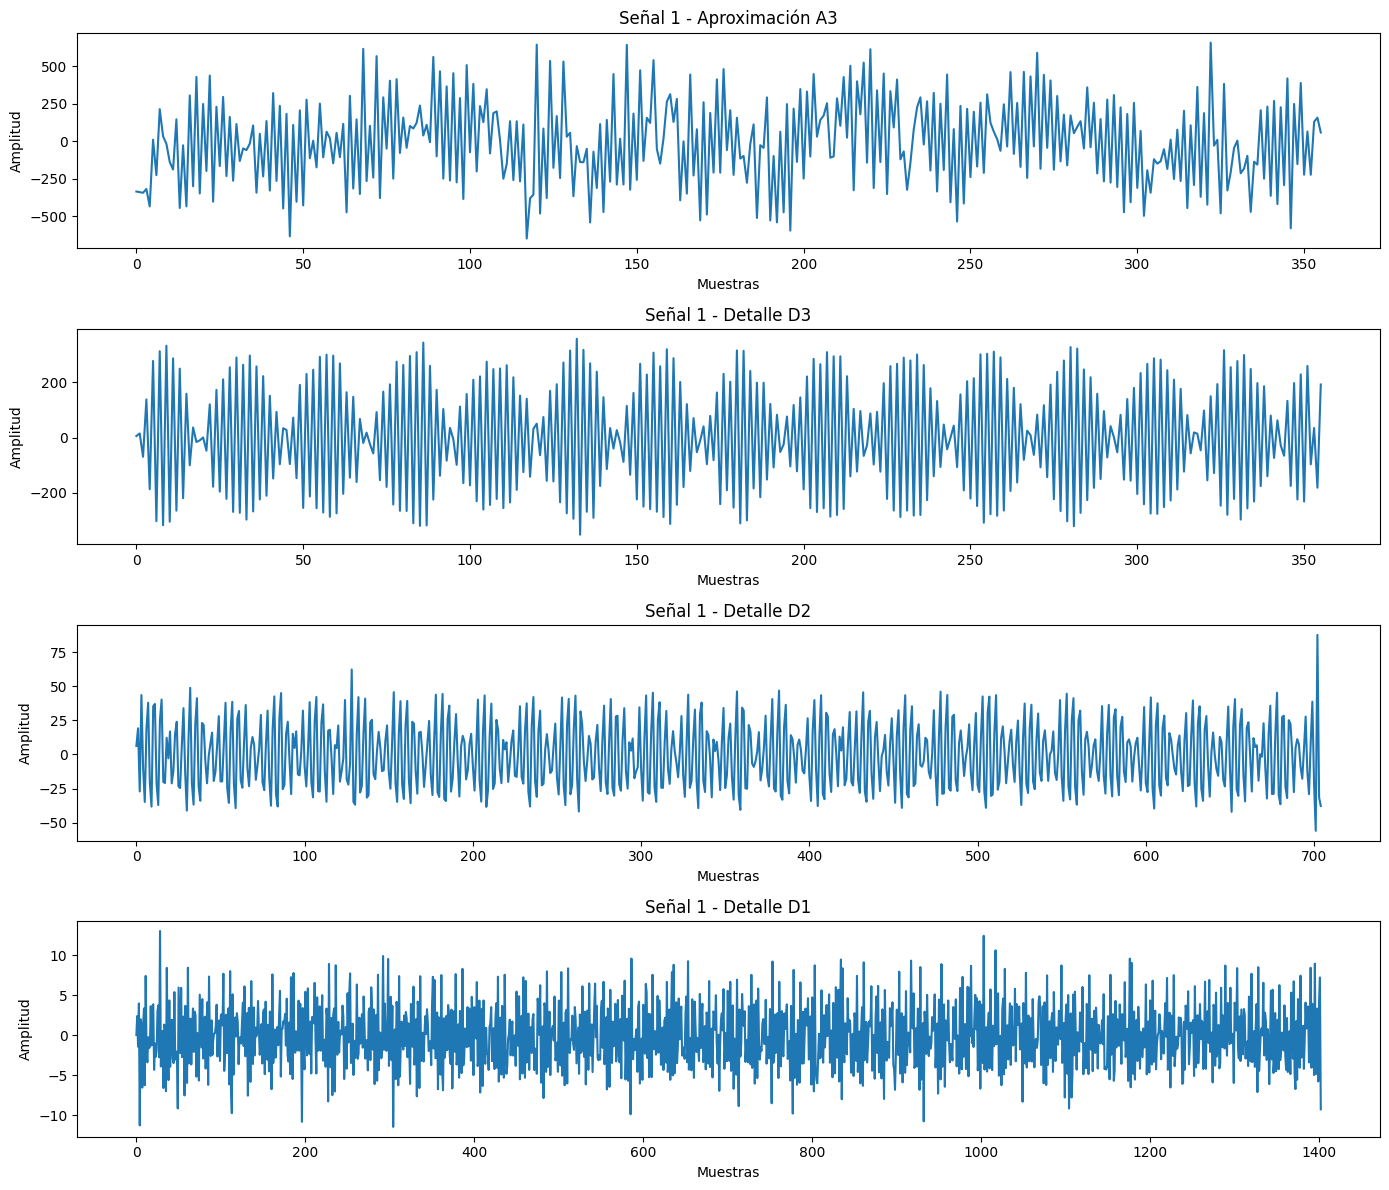

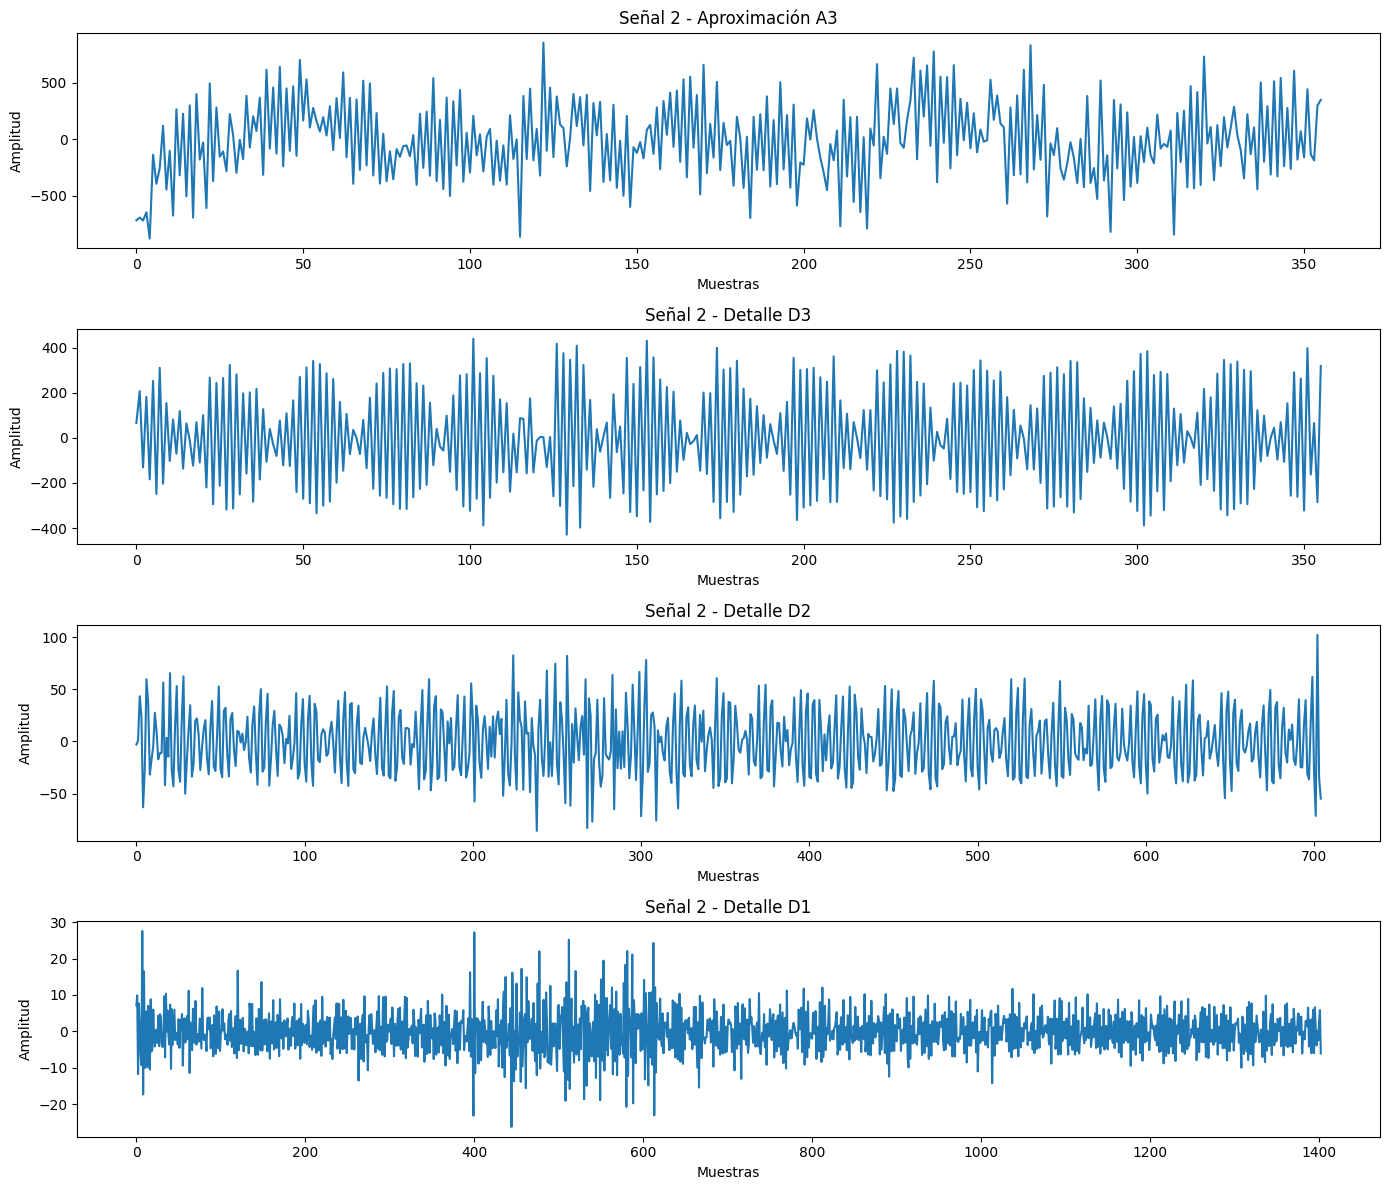

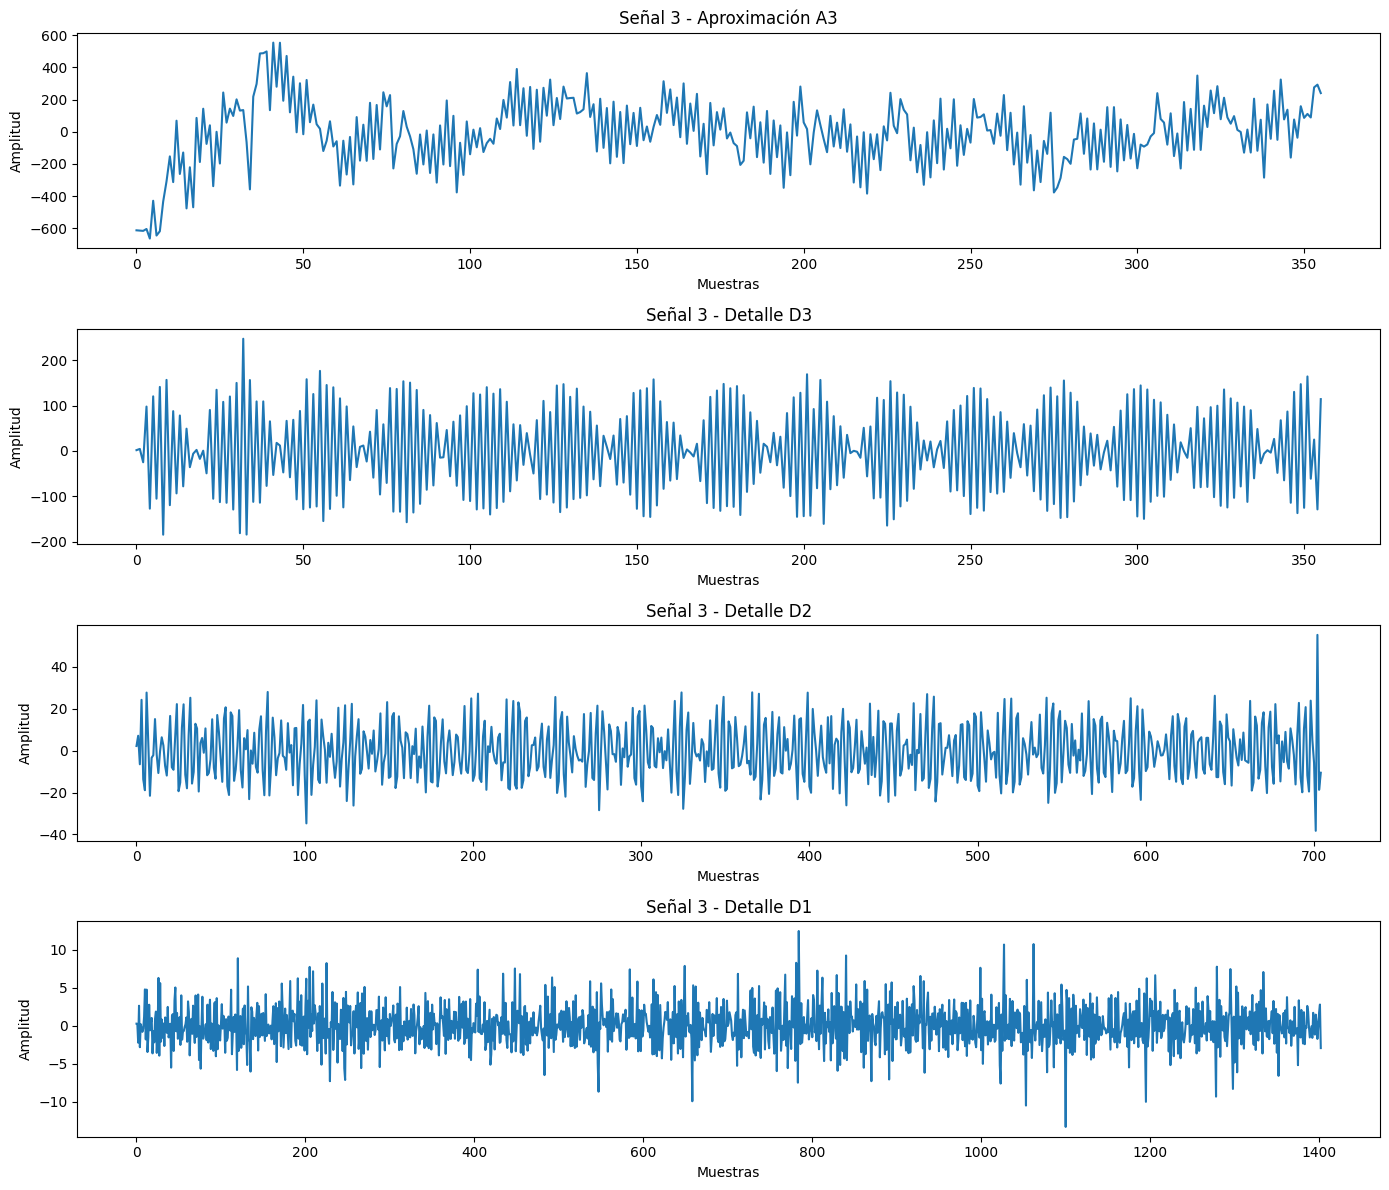

In [18]:
# Crear figuras y subgráficos para los coeficientes de detalle y aproximación
def plot_wavelet_decomposition(coeffs, title):
    plt.figure(figsize=(14, 12))
    # Graficar los coeficientes de aproximación
    plt.subplot(len(coeffs), 1, 1)
    plt.plot(coeffs[0], label='Aproximación A{}'.format(len(coeffs)-1))
    plt.title(f'{title} - Aproximación A{len(coeffs)-1}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')

    # Graficar los coeficientes de detalle
    for i in range(1, len(coeffs)):
        plt.subplot(len(coeffs), 1, i+1)
        plt.plot(coeffs[i], label=f'Detalle D{len(coeffs)-i}')
        plt.title(f'{title} - Detalle D{len(coeffs)-i}')
        plt.xlabel('Muestras')
        plt.ylabel('Amplitud')
    plt.tight_layout()
    plt.show()

# Graficar los coeficientes de detalle y aproximación para cada señal
plot_wavelet_decomposition(coeffs1, 'Señal 1')
plot_wavelet_decomposition(coeffs2, 'Señal 2')
plot_wavelet_decomposition(coeffs3, 'Señal 3')

#Filtro notch

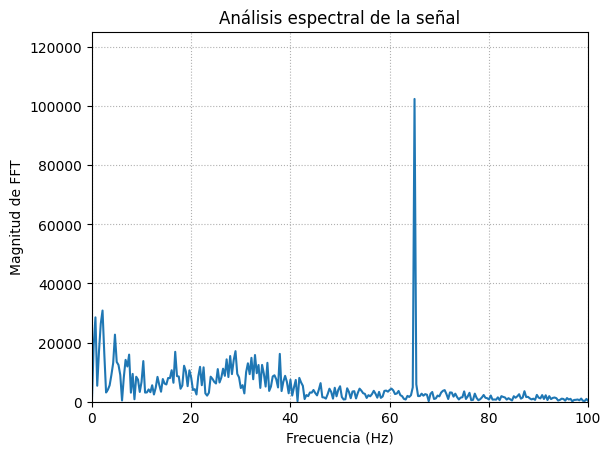

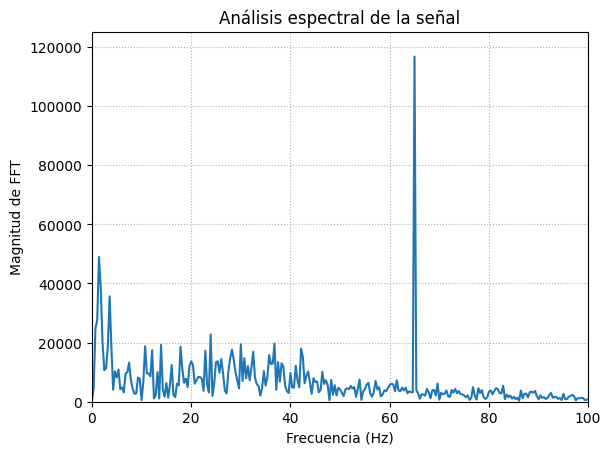

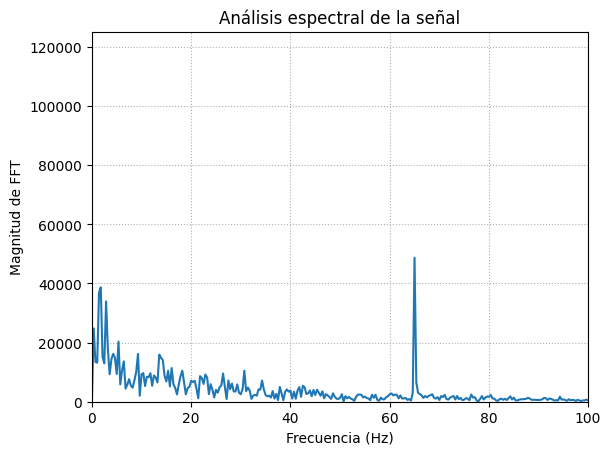

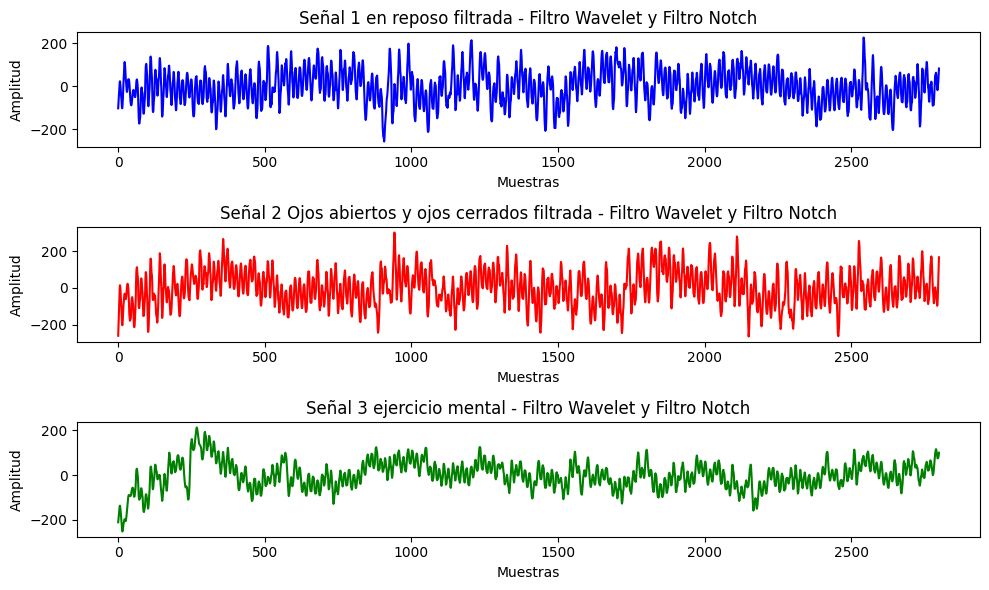

In [19]:
fs = 1000  # Esto es un ejemplo, deberías usar la frecuencia de muestreo correcta de tus datos

# Diseñar el filtro notch para eliminar la frecuencia de línea de energía (en Hz)
f0 = 60.0  # Frecuencia de línea de energía en Hz
Q = 30.0  # Factor de calidad del filtro notch

# Calcular la frecuencia normalizada
w0 = f0 / (fs / 2)

# Diseñar el filtro notch
b, a = signal.iirnotch(w0, Q)

# Aplicar el filtro notch a cada señal
filtered_notch_array1 = signal.filtfilt(b, a, filtered_array1)
filtered_notch_array2 = signal.filtfilt(b, a, filtered_array2)
filtered_notch_array3 = signal.filtfilt(b, a, filtered_array3)

# Mostrar el análisis espectral de las señales filtradas
analisis_espectral(filtered_notch_array1, fs)
analisis_espectral(filtered_notch_array2, fs)
analisis_espectral(filtered_notch_array3, fs)

# Plotear las señales filtradas
plt.figure(figsize=(10, 6))

# Gráfico de la señal 1
plt.subplot(311)
plt.plot(filtered_notch_array1, color='blue')
plt.title('Señal 1 en reposo filtrada - Filtro Wavelet y Filtro Notch')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 2
plt.subplot(312)
plt.plot(filtered_notch_array2, color='red')
plt.title('Señal 2 Ojos abiertos y ojos cerrados filtrada - Filtro Wavelet y Filtro Notch')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Gráfico de la señal 3
plt.subplot(313)
plt.plot(filtered_notch_array3, color='green')
plt.title('Señal 3 ejercicio mental - Filtro Wavelet y Filtro Notch')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

In [20]:
def apply_wavelet_filter1(signal, wavelet='db4', level=3):
    # Eliminar la tendencia lineal
    signal_detrended = detrend(signal)

    # Calcular el umbral global
    sigma = np.median(np.abs(signal_detrended - np.median(signal_detrended))) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(signal_detrended)))

    # Descomposición wavelet
    coeffs = pywt.wavedec(signal_detrended, wavelet, level=level)

    # Aplicar umbralización suave
    coeffs_thresh = [pywt.threshold(c, threshold, mode='soft') if i > 0 else c for i, c in enumerate(coeffs)]

    # Reconstrucción de la señal
    filtered_signal = pywt.waverec(coeffs_thresh, wavelet)
    # Asegurarse de que la señal reconstruida tenga la misma longitud que la original
    filtered_signal = filtered_signal[:len(signal)]

    return filtered_signal, coeffs, coeffs_thresh, threshold

# Aplicar el filtro wavelet a las señales y obtener el umbral
filtered_array1, coeffs1, coeffs_thresh1, threshold1 = apply_wavelet_filter1(array1)
filtered_array2, coeffs2, coeffs_thresh2, threshold2 = apply_wavelet_filter1(array2)
filtered_array3, coeffs3, coeffs_thresh3, threshold3 = apply_wavelet_filter1(array3)

# Imprimir los valores del umbral calculado para cada señal
print(f'Threshold for array1: {threshold1}')
print(f'Threshold for array2: {threshold2}')
print(f'Threshold for array3: {threshold3}')


Threshold for array1: 631.3422697701315
Threshold for array2: 699.3265163613529
Threshold for array3: 320.48568685703873
